In [45]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [46]:
df = pd.read_excel('insurence.xlsx')


In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
df['charges'] = pd.to_numeric(df['charges'])
df['charges'] = df['charges'].astype(float)
print(df['charges'].dtype)

float64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.describe()
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [52]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] ='#00000000'

AGE

In [53]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [54]:
fig = px.histogram(df,x='age',marginal='box',nbins=47,title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [55]:
fig = px.histogram(df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   nbins=47,
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [56]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','gray'],
                   title='Anual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [57]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green','gray'],
                   title='Anual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [58]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green','gray'],
                   title='Anual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [59]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [60]:
fig = px.histogram(df,x='smoker',color='sex',title='Smoker in male and female')
fig.show()

In [61]:
fig = px.scatter(df,x='age',y='charges',color='smoker',opacity=.8,hover_data=['sex'],title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [62]:
fig = px.scatter(df,x='bmi',y='charges',color='smoker',opacity=.8,hover_data=['sex'],title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [63]:
fig = px.violin(df ,
                x = 'children',
                y='charges',
                title='child vs chares')
fig.show()

In [64]:
#findiong correlation 
df.charges.corr(df.age)

0.29900819333064765

In [65]:
df.charges.corr(df.bmi)

0.19834096883362892

In [66]:
df.charges.corr(df.children)

0.06799822684790487

In [67]:
#now we have to also find correlation of smoker but this is not a numeric column
smoker_values = {'no':0,'yes':1}
smoker_numeric= df['smoker'].map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [68]:
df['charges'].corr(smoker_numeric)

0.7872514304984772

In [69]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


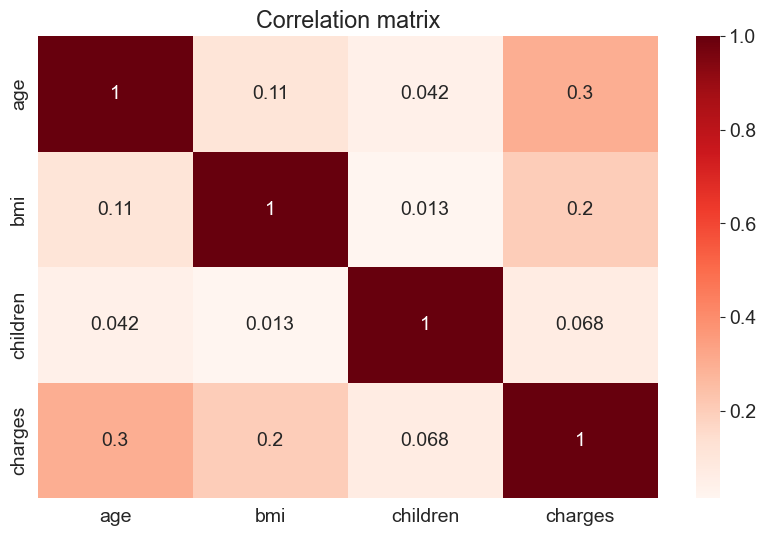

In [70]:
#making correlation using heatmap
sns.heatmap(df.corr(numeric_only=True), cmap='Reds',annot= True)
plt.title("Correlation matrix");
plt.show(0)

In [71]:
non_smoker_df = df[df['smoker']=='no']


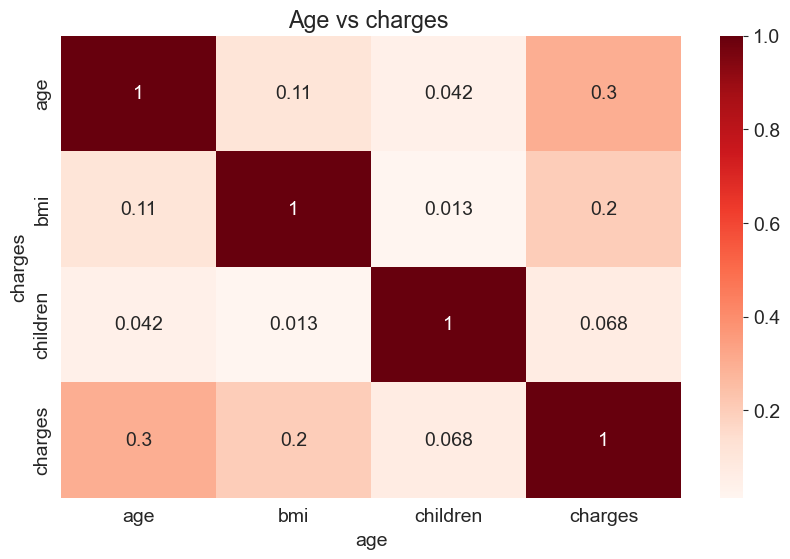

In [72]:
plt.title("Age vs charges ")
sns.scatterplot(data=non_smoker_df,x='age',y='charges')
plt.show()

In [73]:
#we knoe that charges = w*age+b

def estimate_charges(age,w,b):
    return w*age+b


In [74]:
w=50
b=100

In [75]:
print(estimate_charges(30,w,b))

1600


In [76]:
ages =df.age
ages

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [77]:
estimate_charges=estimate_charges(ages,w,b)

In [78]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

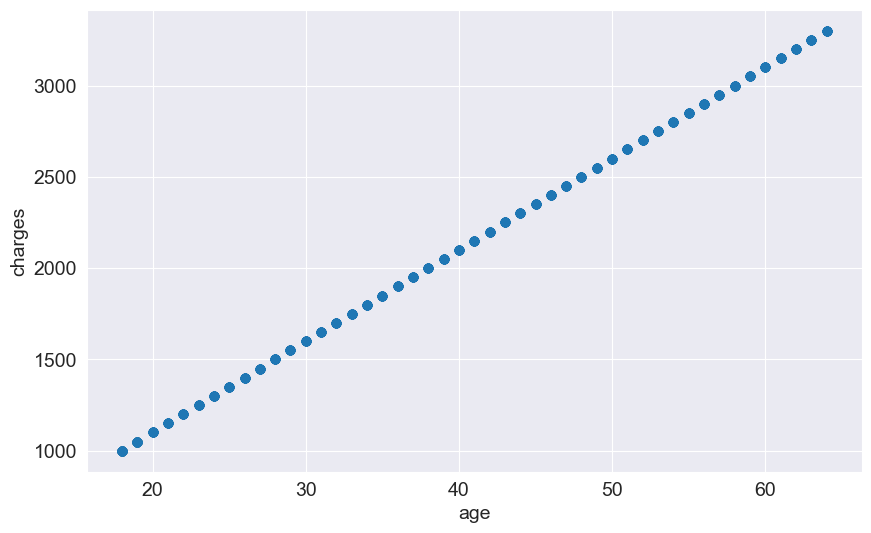

In [80]:
plt.scatter(ages,estimate_charges)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

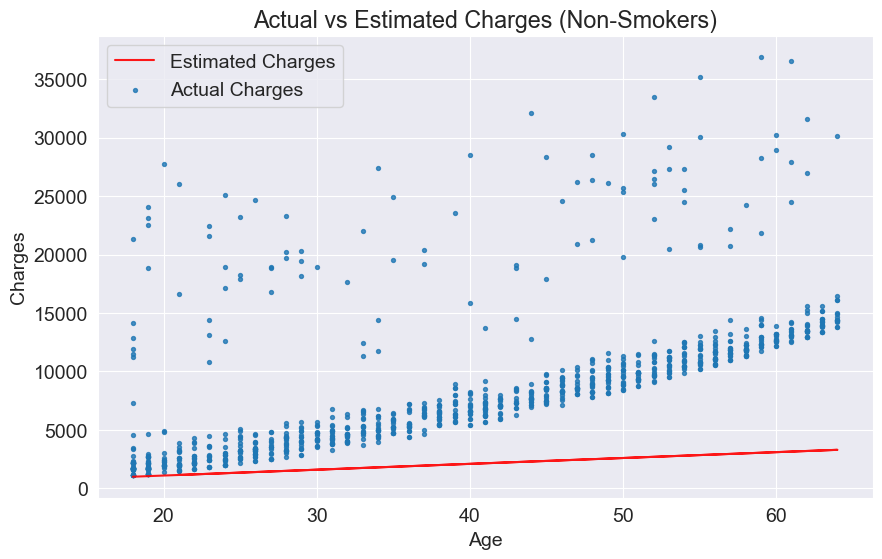

In [92]:
# Make sure this is the same as non_smoker_df['age']
ages = non_smoker_df['age']
target = non_smoker_df['charges']
estimate_charges_non_smoker = estimate_charges[non_smoker_df.index]

plt.plot(ages, estimate_charges_non_smoker, 'r', alpha=0.9, label='Estimated Charges')
plt.scatter(ages, target, s=8, alpha=0.8, label='Actual Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Actual vs Estimated Charges (Non-Smokers)')
plt.legend()
plt.show()


In [111]:
def try_parameters(w, b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']
    estimate_charge = estimate_charges(ages, w, b)  # Call your defined function
    plt.plot(ages, estimate_charge, 'r', alpha=0.9, label='Estimated Charges')
    plt.scatter(ages, target, s=8, alpha=0.8, label='Actual Charges')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title(f'Estimated vs Actual Charges\n(w={w}, b={b})')
    plt.legend()
    plt.show()


In [ ]:
try_parameters(400,-3500)